In [1]:
# Allow the PyMC3 models to be imported in the notebook folder

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from pymc3 import summary, traceplot
import pymc3 as pm

%matplotlib inline

In [3]:
from pymc3_models.models.LinearRegression import LinearRegression

In [4]:
plt.rcParams['figure.figsize'] = (15, 10)

plt.rcParams['font.size'] = 16

Generate Synthetic Data
===

In [5]:
X = np.random.randn(1000, 1)
noise = 2 * np.random.randn(1000, 1)
Y = 4 * X + 3 + noise

In [6]:
Y = np.squeeze(Y)

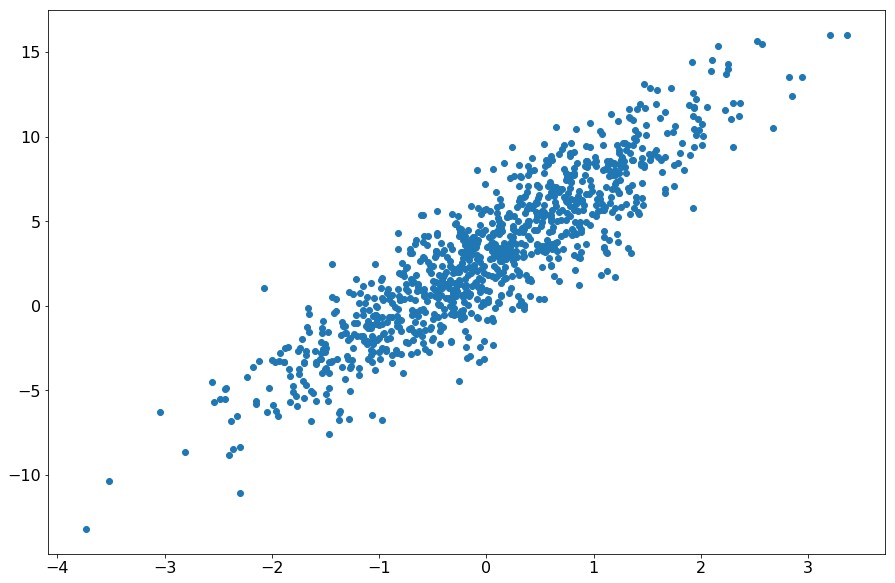

In [7]:
plt.scatter(X, Y)

Fit w/ ADVI
===

In [8]:
LR = LinearRegression()

In [9]:
LR.fit(X, Y, minibatch_size=100)

Average Loss = 229.1:  23%|██▎       | 45993/200000 [00:45<02:33, 1002.45it/s] 
Convergence archived at 46100
Interrupted at 46,099 [23%]: Average Loss = 426.24


LinearRegression()

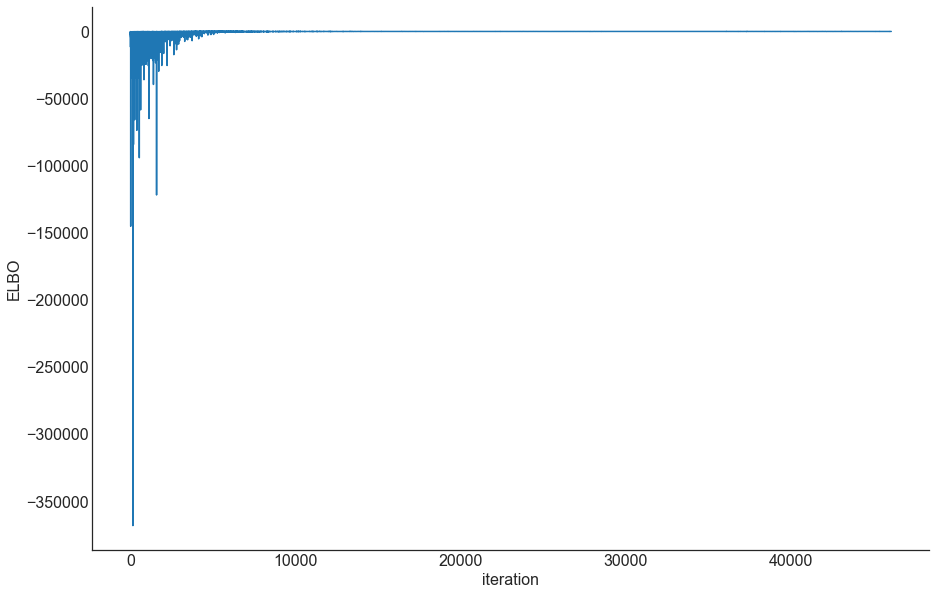

In [10]:
LR.plot_elbo()

In [11]:
Y_predict = LR.predict(X)

100%|██████████| 2000/2000 [00:01<00:00, 1271.65it/s]


In [12]:
LR.score(X, Y)

100%|██████████| 2000/2000 [00:00<00:00, 2137.96it/s]


0.79563443913431064

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c0e5ac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10bfdba58>]], dtype=object)

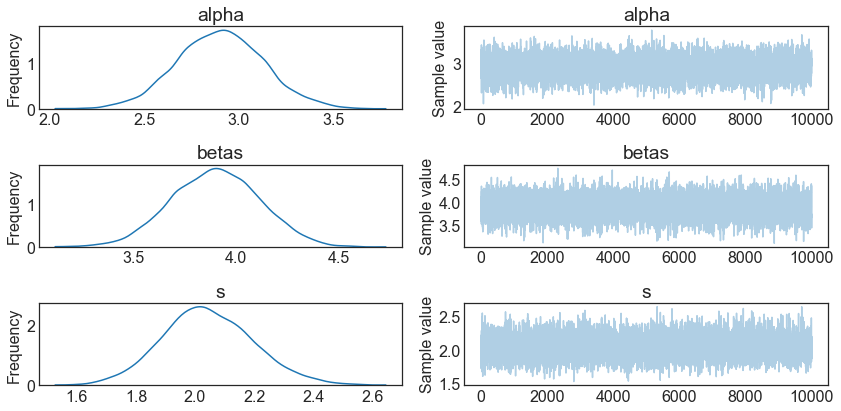

In [13]:
traceplot(LR.trace)

In [15]:
LR.summary

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha__0,2.898906,0.227893,0.002027,2.440689,3.344631
betas__0_0,3.896435,0.215062,0.001917,3.481339,4.312577
s,2.044614,0.154944,0.001603,1.747455,2.359219


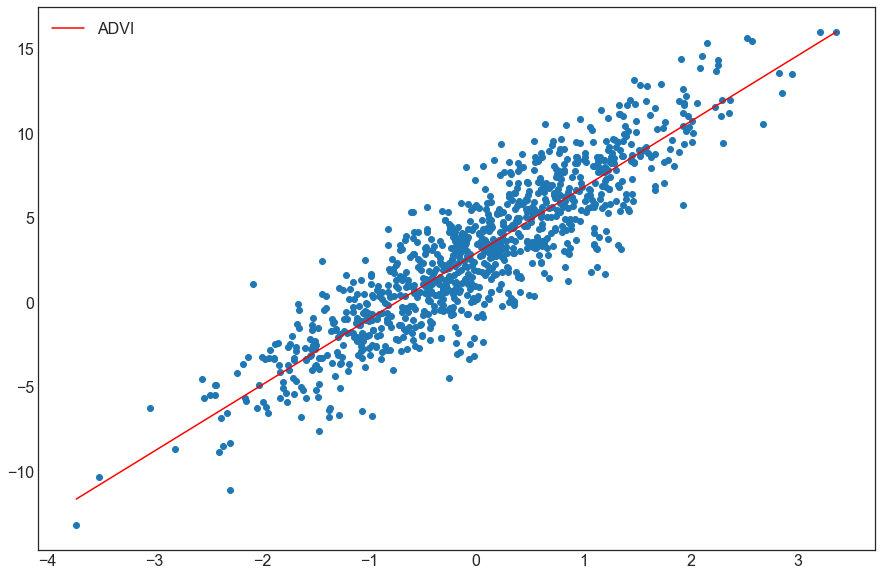

In [17]:
max_x = max(X)
min_x = min(X)

m = LR.summary['mean']['betas__0_0']
b = LR.summary['mean']['alpha__0']
fig1 = plt.figure()
#ax = fig.add_subplot(111)
plt.scatter(X, Y)
plt.plot([min_x, max_x], [m*min_x + b, m*max_x + b], 'r', label='ADVI')
plt.legend()

Fit w/ NUTS
===

In [18]:
LR2 = LinearRegression()

In [19]:
LR2.fit(X, Y, inference_type='nuts', inference_args={'draws': 2000})

100%|██████████| 2500/2500 [00:02<00:00, 1099.25it/s]


LinearRegression()

In [20]:
LR2.score(X, Y)

100%|██████████| 2000/2000 [00:00<00:00, 2147.92it/s]


0.79570062940359843

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x100f0de80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10b223668>]], dtype=object)

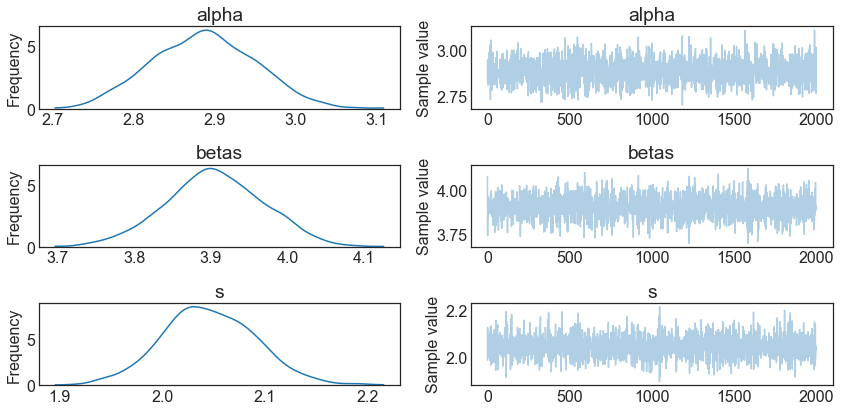

In [21]:
traceplot(LR2.trace)

Compare the two methods
===

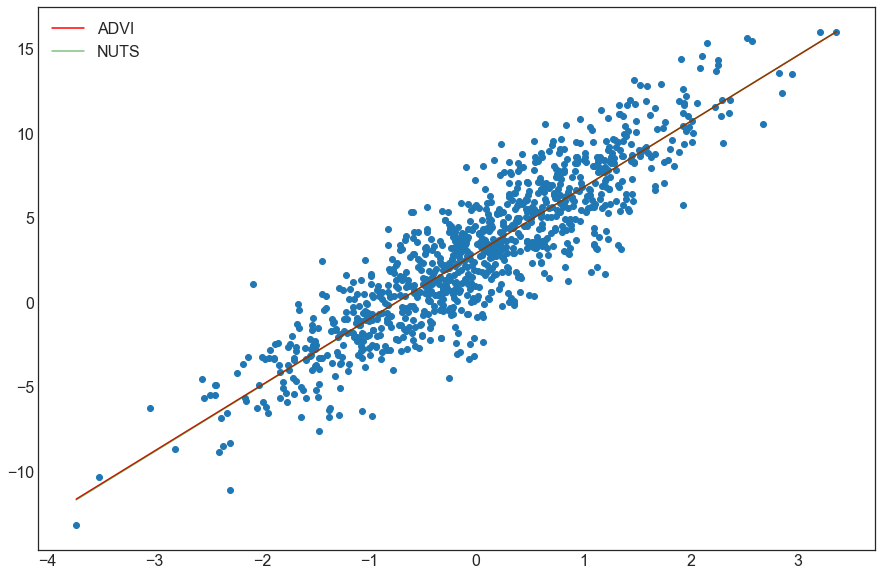

In [22]:
max_x = max(X)
min_x = min(X)

m = LR.summary['mean']['betas__0_0']
b = LR.summary['mean']['alpha__0']

m2 = LR2.summary['mean']['betas__0_0']
b2 = LR2.summary['mean']['alpha__0']
fig1 = plt.figure()
plt.scatter(X, Y)
plt.plot([min_x, max_x], [m*min_x + b, m*max_x + b], 'r', label='ADVI')
plt.plot([min_x, max_x], [m2*min_x + b2, m2*max_x + b2], 'g', label='NUTS', alpha=0.5)
plt.legend()

In [27]:
num_pred = 2
X = np.random.randn(1000, num_pred)
noise = 2 * np.random.randn(1000,)
Y = X.dot(np.array([4, 5])) + 3 + noise

In [28]:
Y = np.squeeze(Y)

In [29]:
Y.shape

(1000,)

In [30]:
LR3 = LinearRegression()

In [ ]:
LR3.fit(X, Y)

Average Loss = 47,092:   1%|          | 1881/200000 [00:01<03:15, 1011.92it/s]